In [ ]:
!git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch

In [ ]:
from facenet_pytorch import MTCNN
import torch
import numpy as np

!pip install -U openmim
!mim install mmcv
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Model

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))
mtcnn = MTCNN(keep_all=True, device=device)

Running on device: cpu


In [ ]:
mtcnn = MTCNN(keep_all=True, device=device)

In [ ]:
video = mmcv.VideoReader('31.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

display.Video('31.mp4', width=640)

In [ ]:
frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    boxes, _  = mtcnn.detect(frame)
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    for box in boxes:
        draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
print('\nDone')

Tracking frame: 74
Done


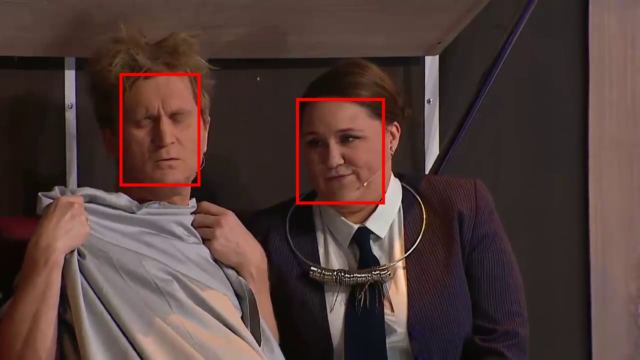

In [ ]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass